In [111]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [112]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [113]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [141]:
batch_size = 64
epochs = 56
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [142]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 128 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 9 images belonging to 1 classes.


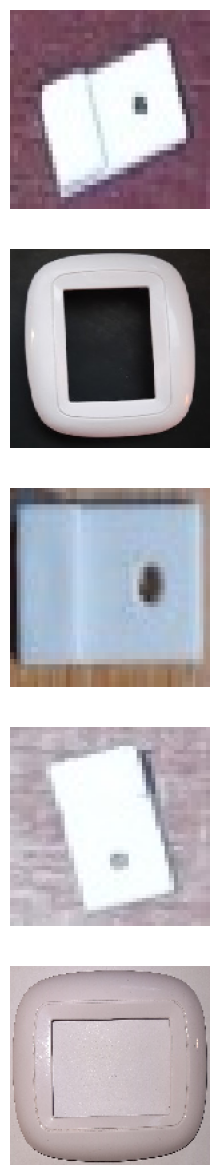

In [143]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {'%.3f'%(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 128 images belonging to 4 classes.


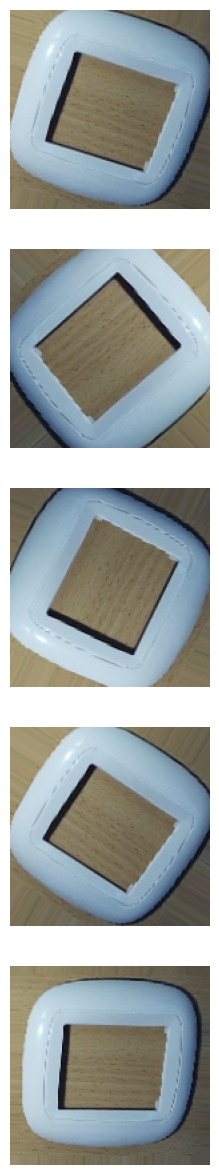

In [144]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [145]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 128 images belonging to 4 classes.


In [146]:
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(64, input_dim=745))
model.add(Dense(64, input_dim=745))
model.add(Dropout(.05))
model.add(Dense(4, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 87616)             0         
                                                                 
 dense_42 (Dense)            (None, 64)                5607488   
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                     

In [147]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [148]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/56
1/1 [==============================] - 2s 2s/step - loss: 1.4128 - accuracy: 0.1875 - val_loss: 29.8767 - val_accuracy: 0.2500
Epoch 2/56
1/1 [==============================] - 1s 805ms/step - loss: 34.5694 - accuracy: 0.2031 - val_loss: 14.0204 - val_accuracy: 0.2500
Epoch 3/56
1/1 [==============================] - 1s 854ms/step - loss: 15.7938 - accuracy: 0.2188 - val_loss: 7.7656 - val_accuracy: 0.2500
Epoch 4/56
1/1 [==============================] - 1s 831ms/step - loss: 8.5202 - accuracy: 0.2969 - val_loss: 3.6624 - val_accuracy: 0.2778
Epoch 5/56
1/1 [==============================] - 1s 795ms/step - loss: 4.0774 - accuracy: 0.2969 - val_loss: 0.9979 - val_accuracy: 0.6667
Epoch 6/56
1/1 [==============================] - 1s 799ms/step - loss: 1.2380 - accuracy: 0.6094 - val_loss: 0.7560 - val_accuracy: 0.6944
Epoch 7/56
1/1 [==============================] - 1s 818ms/step - loss: 0.8284 - accuracy: 0.6250 - val_loss: 0.8976 - val_accuracy: 0.5833
Epoch 8/56
1/1 [===

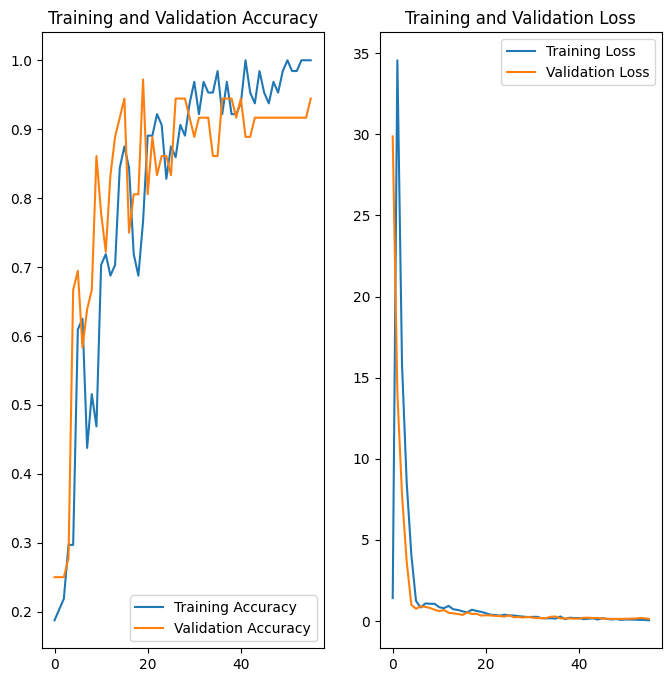

In [149]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [150]:
#save model

model.save('./saved_model/test.h5')

In [121]:
model = tf.keras.models.load_model('saved_model/test.h5')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 87616)             0         
                                                                 
 dense_64 (Dense)            (None, 64)                5607488   
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                     

1/1 [==============================] - 0s 84ms/step


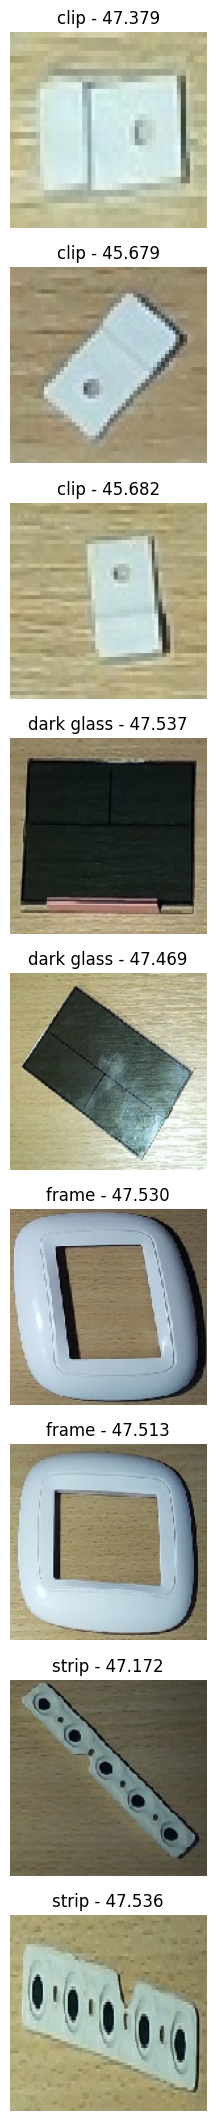

[[0.47378954 0.17513542 0.17530657 0.17576845]
 [0.45678508 0.17771924 0.18069234 0.18480325]
 [0.4568206  0.1777362  0.18701023 0.17843288]
 [0.17487772 0.47536692 0.17487772 0.17487772]
 [0.1750098  0.47468984 0.17529577 0.17500457]
 [0.17492266 0.17488894 0.47529733 0.17489104]
 [0.17503634 0.17491788 0.47513014 0.17491566]
 [0.1769403  0.17570849 0.17563394 0.4717173 ]
 [0.17488319 0.17487904 0.17487922 0.47535858]]


In [151]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)

predictionPercent = []
predictionLabel = []
name = ["clip", "dark glass", "frame", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
print(predictions)